In [1]:
import os
import numpy as np
import torch
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')

from utils import get_data, get_X_show, get_metrics, get_post


In [2]:
seed = 24
np.random.seed(seed)

# get data
d_x = 10  # number of fourier features
n_train = 5
n_test = 10000
X_train, Y_train, X_train_orig = get_data(d_x=d_x, n_data=n_train)
X_train_aug, Y_train_aug, _ = get_data(d_x=d_x, n_data=n_train, x_start=100.0)
X_test, Y_test, X_test_orig = get_data(d_x=d_x, n_data=n_test)
X_show, X_show_orig = get_X_show(d_x=d_x)
Y_true = torch.sum(X_show, 1)


# fit

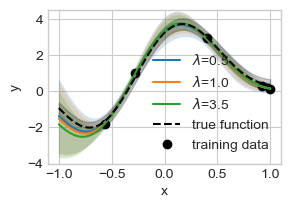

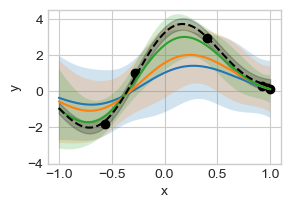

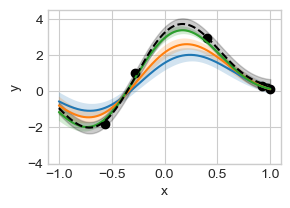

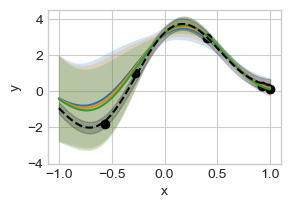

In [4]:
settings = [
    "perfect",
    "model_bad",
    "prior_bad",
    "data_augmentation"
]

for setting in settings:

    if setting == "perfect":
        var_likelihood = 0.025
        var_prior = 1.0
    if setting == "model_bad":
        var_likelihood = 1.0
        var_prior = 1.0
    if setting == "prior_bad":
        var_likelihood = 0.025
        var_prior = 0.05
    if setting == "data_augmentation":
        var_likelihood = 0.025
        var_prior = 1.0
    
    dir_prefix = f"./{setting}/"
    if not os.path.exists(dir_prefix):
        os.makedirs(dir_prefix)

    true_label="true function"
    data_label="training data"

    # model fit
    plt.figure(figsize=(3,2))
    for lamb in [0.5, 1.0, 3.5]:
        if setting == "data_augmentation":
            m_N, S_N, _ = get_post(X_train_aug, Y_train_aug, var_prior, var_likelihood, lamb)
        else:
            m_N, S_N, _ = get_post(X_train, Y_train, var_prior, var_likelihood, lamb)
        
        post_pred_mean = X_show @ m_N
        post_pred_var = torch.diag(X_show @ S_N @ X_show.T)
        
        lamb_label=r"$\lambda$"+f"={lamb}"
        plt.plot(X_show_orig, post_pred_mean, label=lamb_label)
        plt.fill_between(
            X_show_orig,
            post_pred_mean + 2 * torch.sqrt(post_pred_var),
            post_pred_mean - 2 * torch.sqrt(post_pred_var),
            alpha=0.2,
        )
        plt.ylim(-4,4.5)

    plt.plot(X_show_orig, Y_true, label=true_label, linestyle="dashed", color="black")
    plt.fill_between(X_show_orig, Y_true + 2 * 0.158, Y_true - 2 * 0.158, alpha=0.2, color="black")
    plt.scatter(X_train_orig, Y_train, label=data_label, marker="o", color="black")
    
    if setting == "perfect":
        plt.legend()
    
    plt.xlabel("x")
    plt.ylabel("y")
        
    plt.savefig(f"{dir_prefix}/fit_{setting}.png", dpi=1000, bbox_inches='tight')
    plt.show()


# metrics

0.5
1.0
1.5
2.0
2.5
3.0
3.5


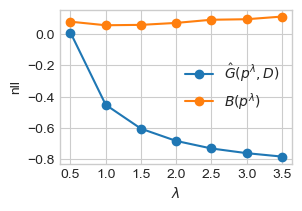

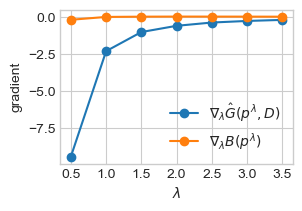

0.5
1.0
1.5
2.0
2.5
3.0
3.5


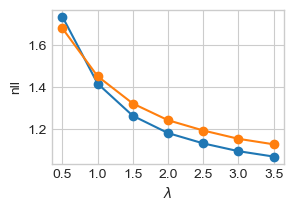

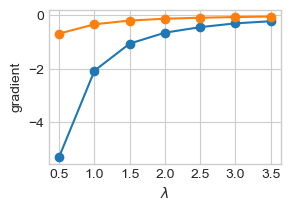

0.5
1.0
1.5
2.0
2.5
3.0
3.5


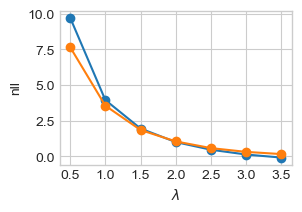

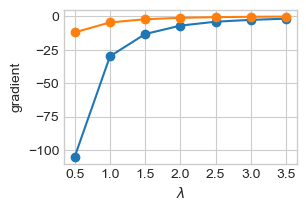

0.5
1.0
1.5
2.0
2.5
3.0
3.5


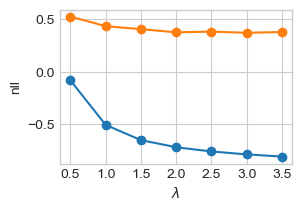

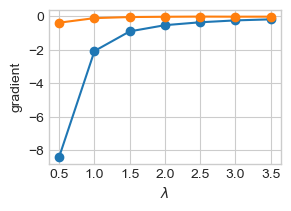

In [14]:
settings = [
    "perfect",
    "model_bad",
    "prior_bad",
    "data_augmentation",
]

for setting in settings:

    if setting == "perfect":
        var_likelihood = 0.025
        var_prior = 1.0
    if setting == "model_bad":
        var_likelihood = 1.0
        var_prior = 1.0
    if setting == "prior_bad":
        var_likelihood = 0.025
        var_prior = 0.05
    if setting == "data_augmentation":
        var_likelihood = 0.025
        var_prior = 1.0

    dir_prefix = f"./{setting}/"
    if not os.path.exists(dir_prefix):
        os.makedirs(dir_prefix)

    lambs = [0.5,1.0,1.5,2.0,2.5,3.0,3.5]

    
    if setting == "data_augmentation":
        result = get_metrics(
            X_train_aug,
            Y_train_aug,
            X_test,
            Y_test,
            var_prior,
            var_likelihood,
            lambs,
        )
    else:
        result = get_metrics(
            X_train,
            Y_train,
            X_test,
            Y_test,
            var_prior,
            var_likelihood,
            lambs,
        )

    # nll
    plt.figure(figsize=(3,2))
    plt.plot(
        np.arange(0, len(lambs), 1),
        result["nll_gibbs_train"],
        marker="o",
        label=r"$\hat G(p^\lambda,D)$",
    )
    plt.plot(
        np.arange(0, len(lambs), 1),
        result["nll_bayes_test"],
        marker="o",
        label=r"$B(p^\lambda)$",
    )
    
    if setting == "perfect":
        plt.legend()
    
    plt.xticks(np.arange(0, len(lambs), 1), lambs)
    plt.xlabel(r"$\lambda$")
    plt.ylabel("nll")

    plt.savefig(f"{dir_prefix}/nll_{setting}.png", dpi=1000, bbox_inches='tight')
    plt.show()

    # grad
    plt.figure(figsize=(3,2))
    plt.plot(
        np.arange(0, len(lambs), 1),
        result["grad_empirical_gibbs"],
        marker="o",
        label=r"$\nabla_\lambda \hat G(p^\lambda,D)$",
    )
    plt.plot(
        np.arange(0, len(lambs), 1),
        result["grad_expected_bayes"],
        marker="o",
        label=r"$\nabla_\lambda B(p^\lambda)$",
    )
    if setting == "perfect":
        plt.legend()
    plt.xticks(np.arange(0, len(lambs), 1), lambs)
    plt.xlabel(r"$\lambda$")
    plt.ylabel("gradient")
    plt.savefig(f"{dir_prefix}/grad_{setting}.png", dpi=1000, bbox_inches='tight')
    plt.show()